# Using Sonar dataset

https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
epoches = 50

In [3]:
df = pd.read_csv("../Data/sonar-all-data.csv")

In [4]:
df.head(1)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,output
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R


#### Replacing -1 for Rock
#### Replacing 1 for Mines

In [5]:
df['output'] = df['output'].replace(['R'], -1)

In [6]:
df['output'] = df['output'].replace(['M'], 1)

In [7]:
df_train,df_test = train_test_split(df,test_size = 0.33)

In [8]:
df_train.head(2)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,output
62,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.003,-1
160,0.0258,0.0433,0.0547,0.0681,0.0784,0.1250,0.1296,0.1729,0.2794,0.2954,...,0.0091,0.0062,0.0019,0.0045,0.0079,0.0031,0.0063,0.0048,0.005,1


In [9]:
df_test.head(2)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,output
184,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057,1
155,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0117,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015,1


In [10]:
x_train, y_train = df_train.drop("output",axis=1),pd.DataFrame(df_train["output"])

In [11]:
x_train.head(1)

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
62,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0047,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.005,0.0024,0.003


In [12]:
y_train.head(1)

,output
62,-1


In [13]:
x_test, y_test = df_test.drop("output",axis=1),pd.DataFrame(df_test["output"])

In [14]:
x_test.head(1)

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
184,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0346,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057


In [15]:
y_test.head(1)

,output
184,1


In [16]:
class Perceptron:
    def __init__(self):
        pass
    
    def fit(self,X,y, epochs = 15):
        X = X.values.tolist()
        y = y.values.tolist()
        self.weights = [random.uniform(-1,1) for x in range(len(X[0]))]
        self.X = X
        self.y = y
        self.errors = [];
        
        for i in range(epochs):
            errorCounter = 0
            for j in range(len(X)):
                temp = np.dot(X[j],self.weights)
                sign = 1 if temp > 0 else -1
                
                if sign != y[j][0]:
                    errorCounter = errorCounter + 1
                    self.weights = np.add(self.weights,np.multiply(X[j],y[j]))
#                     self.weights = [ self.weights[k]+X[j][k]*y[k] for k in range(len(X[0]))]
                else:
                    pass
            self.errors.append(errorCounter)
        pass
    
    def predict(self,test):
        test = test.values.tolist()
        ans = []
        for index,value in enumerate(test):
            temp = np.dot(test[index],self.weights)
            predicted = 1 if temp > 0 else -1
            ans.append(predicted)
        return ans
        pass
    

In [17]:
model = Perceptron()

In [18]:
model.fit(x_train,y_train,epoches)

In [19]:
predictedValues = model.predict(x_test)

In [20]:
f"Accuracy is = {accuracy_score(y_test,predictedValues)*100} %"

'Accuracy is = 79.71014492753623 %'

In [21]:
temp = [i+1 for i in range(epoches)]

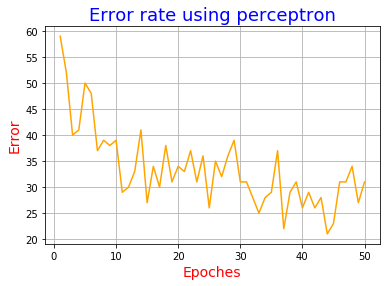

In [22]:
plt.title("Error rate using perceptron",fontsize=18, color='Blue')
plt.xlabel("Epoches",fontsize=14, color='red')
plt.ylabel("Error",fontsize=14, color='red')
plt.plot(temp,model.errors,color='orange')
plt.grid(True)
plt.show()

In [23]:
model.weights

array([  6.02237006,   1.71227033,   5.5900607 ,   2.02456069,
         7.26094499,  -1.33950911, -11.93044377,  -1.33465572,
        13.67229524,   6.44665054,   9.89993358,   9.46368663,
         9.38452202,  -9.20060826,  -7.41507068,  -6.37704883,
       -10.04379533,   4.01465716,   7.05978669,  -1.06566501,
         0.28949297,   7.76140453,  -2.46447835,   4.56031163,
        -9.58087645,  -7.13396077,   7.37054279,   5.28688934,
         5.86361111,  -1.70968152, -20.68143754,  16.35262889,
        -0.87456685, -17.36645435,   3.65106672,  -2.90512961,
        -6.13539044,  -1.07259755,   6.45405433,  -7.76604982,
        -0.81441884,   2.62745609,   6.46918156,   9.01564667,
        10.2954478 ,  12.94357708,   4.86105173,   6.94128296,
         7.9562418 ,  -1.07423377,   0.9959284 ,  -0.82589014,
        -0.04552626,   4.28284805,  -0.58929667,  -0.57584488,
        -2.34865008,   1.19121136,   0.39949087,  -0.78135648])

In [24]:
np.asarray(model.errors)

array([59, 52, 40, 41, 50, 48, 37, 39, 38, 39, 29, 30, 33, 41, 27, 34, 30,
       38, 31, 34, 33, 37, 31, 36, 26, 35, 32, 36, 39, 31, 31, 28, 25, 28,
       29, 37, 22, 29, 31, 26, 29, 26, 28, 21, 23, 31, 31, 34, 27, 31])